##### Importing pandas and editing display rows settings, and reading the csv file which we extracted

In [1]:
import pandas as pd
import numpy as np
import re
import math 
import datetime

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('training_data.csv')

##### Selecting the additions column to explore it and see if there are any features we can extract from it, thus we group the words and their counts

In [3]:
additions = df['إضافات']
words = additions.str.split(expand=True).stack()
word_frequency = words.value_counts()

word_frequency

مسجل        6075
CD          5825
مُكيّف      5763
مركزي       5667
إغلاق       5603
            ... 
كروزر          1
3000Cc         1
وتحتاج         1
##¥¥.          1
وخاششسسس       1
Name: count, Length: 17869, dtype: int64

##### As we can see above, we a few words have been mentioned more than a thousand time which is a large percentage of the data in our hands, so they probably have an affect on (price)

##### Now we want to select the words that have been mentioned in more than 30% of the total data we have

In [4]:
frequency_threshold = len(df) * 0.3
selected_words = word_frequency[word_frequency > frequency_threshold].index.tolist()
for word in selected_words:
    df[word] = df['إضافات'].apply(lambda x: 1 if word in str(x) else 0)
df = df.drop('إضافات', axis=1)
df
             

,سعر,شركة,موديل,سنة,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,مسجل,CD,مُكيّف,مركزي,إغلاق,مغنيسيوم,حماية,هوائية,وسادة,جنطات,جهاز,إنذار,جلد,فرش,سقف,فتحة
0,100000,كيا,اوبتيما,2014,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,60000,كيا,سورينتو,2007,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,43500,هونداي,افانتي,2006,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,NaN,نقدا فقط,للبيع فقط,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
3,5500,فيات,127,1982,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,54000,بيجو,208,2014,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,4+1,نقدا فقط,للبيع فقط,NaN,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,45000,كيا,مورننغ,2015,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000,4+1,إمكانية التقسيط,للبيع فقط,2,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
6860,48000,فورد,ترانزيت,2002,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,00000,7+1,نقدا فقط,للبيع فقط,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6861,87000,بيجو,بارتنر,2018,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000,4+1,نقدا فقط,للبيع فقط,يد صفر,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0
6862,126000,كيا,سورينتو,2017,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100,6+1,نقدا فقط,للبيع فقط,ثانيه,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   سعر           6864 non-null   int64 
 1   شركة          6864 non-null   object
 2   موديل         6819 non-null   object
 3   سنة           6864 non-null   int64 
 4   لون السيارة   6864 non-null   object
 5   نوع الوقود    6864 non-null   object
 6   أصل السيارة   6864 non-null   object
 7   رخصة السيارة  6864 non-null   object
 8   نوع الجير     6864 non-null   object
 9   الزجاج        6864 non-null   object
 10  قوة الماتور   6864 non-null   int64 
 11  عداد السيارة  4923 non-null   object
 12  عدد الركاب    6087 non-null   object
 13  وسيلة الدفع   6864 non-null   object
 14  معروضة        6864 non-null   object
 15  أصحاب سابقون  5214 non-null   object
 16  مسجل          6864 non-null   int64 
 17  CD            6864 non-null   int64 
 18  مُكيّف        6864 non-null   int64 
 19  مركزي 

#### So some of the words we extracted are sperated into two columns like "إغلاق مركزي" which are two columns instead of one, which we're going to fix

In [6]:
compound_words_selected = {
    'إغلاق مركزي':['إغلاق','مركزي'],
    'جنطات مغنيسيوم':['جنطات','مغنيسيوم'],
    'وسادة هوائية':['وسادة','هوائية'],
    'جهاز إنذار':['جهاز','إنذار'],
    'فرش جلد':['فرش','جلد'],
    'فتحة سقف':['فتحة','سقف']
}


##### Now we apply the columns edits to the DF

In [7]:
for key, value in compound_words_selected.items():
    df = df.rename(columns={value[0]: key})
    df = df.drop(value[1], axis=1)
df = df.drop('حماية', axis=1)
df

,سعر,شركة,موديل,سنة,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,مسجل,CD,مُكيّف,إغلاق مركزي,وسادة هوائية,جنطات مغنيسيوم,جهاز إنذار,فرش جلد,فتحة سقف
0,100000,كيا,اوبتيما,2014,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,1,1,1,1,1,1,1,1,1
1,60000,كيا,سورينتو,2007,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,1,1,1,1,1,1,1,1,1
2,43500,هونداي,افانتي,2006,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,NaN,نقدا فقط,للبيع فقط,NaN,1,1,1,1,1,1,1,1,1
3,5500,فيات,127,1982,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,1,1,1,0,0,0,0,1,0
4,54000,بيجو,208,2014,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,4+1,نقدا فقط,للبيع فقط,NaN,0,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,45000,كيا,مورننغ,2015,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000,4+1,إمكانية التقسيط,للبيع فقط,2,0,0,1,1,1,1,1,0,0
6860,48000,فورد,ترانزيت,2002,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,00000,7+1,نقدا فقط,للبيع فقط,5,1,0,0,0,0,0,0,0,0
6861,87000,بيجو,بارتنر,2018,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000,4+1,نقدا فقط,للبيع فقط,يد صفر,1,1,1,1,1,0,1,0,0
6862,126000,كيا,سورينتو,2017,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100,6+1,نقدا فقط,للبيع فقط,ثانيه,1,1,1,1,1,1,1,1,1


##### Now we want to see what are the catagories for each column, and do some normalization later, i want to see only those that are ambigious

In [8]:
columns = list(df.columns)
columns.remove("سعر")
columns.remove("شركة")
columns.remove("موديل")
columns.remove("سنة")
columns.remove("لون السيارة")
columns.remove("قوة الماتور")

for col in columns:
    print(f'{col} Values: {df[col].unique()}')

نوع الوقود Values: ['بنزين ' 'ديزل ' 'هايبرد ' 'كهرباء ']
أصل السيارة Values: ['خصوصي ' 'عمومي ' 'تأجير ' 'تجاري ' 'تدريب سياقة ' 'حكومي ']
رخصة السيارة Values: ['فلسطينية ' 'نمرة صفراء ']
نوع الجير Values: ['اوتوماتيك ' 'نصف اوتوماتيك ' 'عادي ']
الزجاج Values: ['الكتروني ' 'يدوي ']
عداد السيارة Values: ['75000 ' '130000 ' nan ... '222222 ' '177 ' '7686866 ']
عدد الركاب Values: ['4+1 ' '7+1 ' nan '4+1  ' '5+1 ' '٤+١ ' '8 ' '6+1 ' '4+١ ' '٧ ' '7+ 1 '
 '7:1 ' '1+7 ' '١+٤ ' '2+1 ' '6+١ ' '+1 ' '6±١ ' '22 ' '1+1 ' '٥+١ '
 '٧+1 ' '5+2 ' 'مثال: 4 + 1 ' '7.1 ' '7 =1 ' '٧+١ ' '1+2 ' '6x1     '
 '1+٤ ' '4+1   ' '2/1 ' '8+1 ' '٨+١ ' '٦+١ ' '2 ' '4+2 ' '1٠4 ' '4\\١ '
 '000 ' '3+1 ' '1 ' 'اكثر من 10 ' '9+1 ']
وسيلة الدفع Values: ['نقدا فقط ' 'إمكانية التقسيط ']
معروضة Values: ['للبيع فقط ' 'للبيع أو التبديل ' 'للتبديل فقط ']
أصحاب سابقون Values: ['يد اولى ' '2 ' nan '00  ' '0 ' '1 ' 'يد ثانية ' '4 ' 'يد ثانيه ' '3 '
 'ثالثة ' 'غير منمر استيراد الماني ' '00 ' 'غير منمرة ' 'أولى ' '٨ '
 'يد اولا ' '

##### As seen above some columns are correct and some others have different names for the same meaning and we need to fix that, the columns that beed fixing are 
[
    "عداد السيارة"
    ,"عدد الركاب"
    ,"أصحاب سابقون"
    ]
    The rest seem to be fine,
##### We would start with "عدد الركاب"

##### I can see it has arabic numbers we would start with that first and convert them to english ones, this translation table would be used to translate arabic numbers
##### Second we would want to have them as numbers only so if there is one number keep as is, if two add them up

In [9]:
arabic_numbers = '٠١٢٣٤٥٦٧٨٩'
english_numbers = '0123456789'
translate_arabic_numbers = str.maketrans(arabic_numbers, english_numbers)

def get_number_from_string(string):
   numbers = re.findall(r'\d+', string)
   total = sum(int(num) for num in numbers)
   return total

##### We can place them in a function that we would ultimately use when we transform the "عدد الركاب" column

In [10]:
def extract_num(value):
    if get_number_from_string(str(value).translate(translate_arabic_numbers)):
        return get_number_from_string(str(value).translate(translate_arabic_numbers))
    return 5

df["عدد الركاب"] = df["عدد الركاب"].apply(extract_num)

##### Now we would go with "عداد السيارة" column
##### It has characters other than numbers and there are people who type the numbers without explicitly typing in thousands, .e.g they might type 100 instead of 100000, so these numbers are going to be converted to thousands

In [11]:
def convert_car_meter(value):

    number = re.findall(r'\d+', str(value))

    if(not number):
        return None
    number = number[0]
    
    if (float(number) / 1000) >=1:
        return int(number)
    
    return int(number)*1000

df["عداد السيارة"] = df["عداد السيارة"].apply(convert_car_meter)

##### There is still and issue, the null values are going to cause us problem in the learning algorithm so after some research i found out that we can get he value of the "عداد السيارة" from the year and the engine capacity of the car which we already have as "سنة" and "قوة الماتور" and "" and using this survey i found https://www.unescwa.org/sites/default/files/event/materials/palestine_survey_on_energy_use_in_transport_2015_en_with_tables.pdf we can estimate the values of the "عداد السيارة" instead of them being null. Using tables '8 and "14 in pages '35 and "39
##### Now i want to define a dictionary of the survey tables to use

In [12]:
kilometers_per_liter = {
"بنزين":{
        "less":10.8,
        "more":7.7
},"ديزل":{
        "less":9.7,
        "more":5.6
}
}
amount_of_fuel_per_month = {
  "بنزين":{
        "less":159,
        "more":270
},"ديزل":{
        "less":389,
        "more":841
}  
}

##### Now i would do the code to estimate the "car meter" values

In [13]:
today = datetime.date.today()
year = today.year
fuel_keys = ["بنزين","ديزل"]
for index, row in df.iterrows():
   if math.isnan(row["عداد السيارة"]) or row["عداد السيارة"] == 0:
        new_value = int()
        cc = int()
        if row["قوة الماتور"] > 2500:
            cc = "more"
        else:
            cc = "less"
        if not row["نوع الوقود"].strip() in fuel_keys:
            new_value = int((year - row["سنة"])*12*1500)
        else:
            Kvalue = kilometers_per_liter[row["نوع الوقود"].strip()][cc]
            Fvalue = amount_of_fuel_per_month[row["نوع الوقود"].strip()][cc]
            denominator = int(row["سنة"]/995)
            new_value = int(((year - row["سنة"])*12*Fvalue*Kvalue)/denominator)
        df.at[index, "عداد السيارة"] = new_value
        


In [14]:
df

,سعر,شركة,موديل,سنة,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,مسجل,CD,مُكيّف,إغلاق مركزي,وسادة هوائية,جنطات مغنيسيوم,جهاز إنذار,فرش جلد,فتحة سقف
0,100000,كيا,اوبتيما,2014,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,5,نقدا فقط,للبيع فقط,يد اولى,1,1,1,1,1,1,1,1,1
1,60000,كيا,سورينتو,2007,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,8,إمكانية التقسيط,للبيع أو التبديل,2,1,1,1,1,1,1,1,1,1
2,43500,هونداي,افانتي,2006,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,175154.0,5,نقدا فقط,للبيع فقط,NaN,1,1,1,1,1,1,1,1,1
3,5500,فيات,127,1982,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,844862.0,5,إمكانية التقسيط,للبيع فقط,00,1,1,1,0,0,0,0,1,0
4,54000,بيجو,208,2014,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,5,نقدا فقط,للبيع فقط,NaN,0,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,45000,كيا,مورننغ,2015,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000.0,5,إمكانية التقسيط,للبيع فقط,2,0,0,1,1,1,1,1,0,0
6860,48000,فورد,ترانزيت,2002,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,475435.0,8,نقدا فقط,للبيع فقط,5,1,0,0,0,0,0,0,0,0
6861,87000,بيجو,بارتنر,2018,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000.0,5,نقدا فقط,للبيع فقط,يد صفر,1,1,1,1,1,0,1,0,0
6862,126000,كيا,سورينتو,2017,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100000.0,7,نقدا فقط,للبيع فقط,ثانيه,1,1,1,1,1,1,1,1,1


##### Now we come for the "أصحاب سابقون" column which needs a bit of workarounds, and i think imma use a dict that has strings which point to a number representing them using a regex

In [15]:
regex_mapping = {
    "شرك":1,
    "صفر":0,
    "اول":1,
    "أول":1,
    "ثان":2,
    "تان":2,
    "ثال":3,
    "تال":3,
    "راب":4,
    "خام":5,
    "ساد":6,
    "ساب":7,
    "ثام":8,
    "تام":8,
    "تاس":9,
    "عاش":10,
    "مست":1,
    "غير":0,
    "مش":0,
    "نفس":1,
}
# def previous_users_transform(text):
#     string = str(text).translate(translate_arabic_numbers)
#     for key,value in regex_mapping.items():
#         match = re.search(key,string)
#         if(match):
#             return value
#     if get_number_from_string(string) > -1:
#         if get_number_from_string(string) == 0:
            
#         return get_number_from_string(string)
#     return None



for index, row in df.iterrows():
        new_value = None
        text = row["أصحاب سابقون"]
        string = str(text).translate(translate_arabic_numbers)
        for key,value in regex_mapping.items():
            match = re.search(key,string)
            if(match):
                new_value = value
                continue
        if get_number_from_string(string) > 0:   
            new_value = get_number_from_string(string)
        else:
             new_value = int((year - row["سنة"])/10)
        df.at[index, "أصحاب سابقون"] = new_value

## -----------------------

#### Now we want to analyze the data we have and see its shape

##### Now we want to import the data we extracted

In [16]:
df.head()

,سعر,شركة,موديل,سنة,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,مسجل,CD,مُكيّف,إغلاق مركزي,وسادة هوائية,جنطات مغنيسيوم,جهاز إنذار,فرش جلد,فتحة سقف
0,100000,كيا,اوبتيما,2014,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,5,نقدا فقط,للبيع فقط,0,1,1,1,1,1,1,1,1,1
1,60000,كيا,سورينتو,2007,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,8,إمكانية التقسيط,للبيع أو التبديل,2,1,1,1,1,1,1,1,1,1
2,43500,هونداي,افانتي,2006,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,175154.0,5,نقدا فقط,للبيع فقط,1,1,1,1,1,1,1,1,1,1
3,5500,فيات,127,1982,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,844862.0,5,إمكانية التقسيط,للبيع فقط,4,1,1,1,0,0,0,0,1,0
4,54000,بيجو,208,2014,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,5,نقدا فقط,للبيع فقط,0,0,0,1,1,1,1,1,0,0


##### The one thing that stands out from the above table is the "إضافات" column which seems to have a good chuck of information that we can use, we'll keep that in mind, and the other things are that some columns have a diverse collection of unique values that are different but have the same meaning, some values are "1,يد اولى" which mean the same thing, so we would keep that in mind, and other columns have the same as this issue

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   سعر             6864 non-null   int64  
 1   شركة            6864 non-null   object 
 2   موديل           6819 non-null   object 
 3   سنة             6864 non-null   int64  
 4   لون السيارة     6864 non-null   object 
 5   نوع الوقود      6864 non-null   object 
 6   أصل السيارة     6864 non-null   object 
 7   رخصة السيارة    6864 non-null   object 
 8   نوع الجير       6864 non-null   object 
 9   الزجاج          6864 non-null   object 
 10  قوة الماتور     6864 non-null   int64  
 11  عداد السيارة    6864 non-null   float64
 12  عدد الركاب      6864 non-null   int64  
 13  وسيلة الدفع     6864 non-null   object 
 14  معروضة          6864 non-null   object 
 15  أصحاب سابقون    6864 non-null   object 
 16  مسجل            6864 non-null   int64  
 17  CD              6864 non-null   i

In [18]:
columns_names_arabic_english = {
    "سعر":"Price",
    "شركة":"Brand",
    "موديل":"Model",
    "سنة":"Year",
    "لون السيارة":"Color",
    "نوع الوقود":"Fuel_Type",
    "أصل السيارة":"Vehicle_History",
    "رخصة السيارة":"Licence",
    "نوع الجير":"Transmission_Type",
    "الزجاج":"Windows_Type",
    "قوة الماتور":"Engine_Capacity",
    "عداد السيارة":"Kilometers_Driven",
    "عدد الركاب":"Seats",
    "وسيلة الدفع":"Payment_Method",
    "معروضة":"Listed_For",
    "أصحاب سابقون":"Previous_Owners",
    "مسجل":"Radio",
    "CD":"CD",
    "مُكيّف":"Air_Conditioner",
    "إغلاق مركزي":"Central_Lock",
    "وسادة هوائية":"Airbag",
    "جنطات مغنيسيوم":"Magnesium_Rims",
    "جهاز إنذار":"Alert_System",
    "فرش جلد":"Leather_Seats",
    "فتحة سقف":"Sunroof"
}

#### The first thing i want to change are the columns names, should've changed them before and renamed them in english but whatever, better be late than never

In [19]:
df = df.rename(columns=columns_names_arabic_english)

##### Now i wanna see if we have null values in the data

In [20]:
df.isna().sum()

Price                 0
Brand                 0
Model                45
Year                  0
Color                 0
Fuel_Type             0
Vehicle_History       0
Licence               0
Transmission_Type     0
Windows_Type          0
Engine_Capacity       0
Kilometers_Driven     0
Seats                 0
Payment_Method        0
Listed_For            0
Previous_Owners       0
Radio                 0
CD                    0
Air_Conditioner       0
Central_Lock          0
Airbag                0
Magnesium_Rims        0
Alert_System          0
Leather_Seats         0
Sunroof               0
dtype: int64

##### As we can see from the above breakdown, the "Model" column has a few null values, and i don't see any better way to deal with them but by removing them, the "Model" column is a very vital feature in a cars price, in which keeping the null values would damage the resulting model badly. We'll deal with it right now

In [21]:
df = df.drop(df[df["Model"].isna()].index)
df["Model"].unique()

array(['اوبتيما', 'سورينتو', 'افانتي', '127', '208', 'ام', 'كورسا',
       'C200', 'فيستا', 'باترول', 'ترانزيت', '206+', 'فابيا', '1998',
       'برايد', 'بارتنر', 'كادي', 'اكورد', 'اسكونا', 'سانتافيه',
       'الانترا', 'i30', 'توسان', 'رابيد', 'i40', 'اوكتافيا', 'فورتي',
       'كاديت', 'اكسنت', 'بولو', 'لانوس', 'توران', 'اوبترا', 'رايسر',
       'R9', 'فيتو', 'شيروكي', 'كرافيل', 'جيتس', 'جولف', 'باسات',
       'ترانسبورتر', 'زافيرا', 'سوبيرب', 'بيكانتو', 'فوكس', 'نوبيرا',
       'افيو', 'نارية', '305', 'كسارا', 'كليك', 'i25', '307', 'CC',
       'ماتيز', '220', 'FH', 'أوميغا', 'ريو', 'استرا', 'R5', '6',
       'ليجانزا', 'سبورتاج', 'طوارق', 'تروبر', 'يونغ', 'ابيزا', 'دوبلو',
       'C250', '206', 'كونيكت', 'فيرنا', '2000', 'كورولا', 'ليون', 'i20',
       'عريض', 'نملة', 'GTI', 'تيندرا', 'ix35', '200', 'C-Elysee',
       'S350Long', '614', 'بيتل', 'سيفيك', 'كليو', 'باجيرو', '205',
       'S320', 'E300', 'باندا', '250', 'بيكاسو', 'بورا', 'LT', 'كبينة',
       '410', 'H1', '207', 'كاري

##### Now from the above i can see some values that are not what a car modle should be, some are years and some are nmubers, the way i see it, the ones written in numbers and have 4 digits, i am going to compare them to the year column, if they were the same value, i'll just drop the row, the first step is to convert the arabic numbers to english ones

In [22]:
arabic_numbers = '٠١٢٣٤٥٦٧٨٩'
english_numbers = '0123456789'
translate_arabic_numbers = str.maketrans(arabic_numbers, english_numbers)
df["Model"] = df["Model"].str.translate(translate_arabic_numbers)

In [23]:
df["Model_Is_Year"] =  df["Model"] == df["Year"].astype("string")
df = df[df['Model_Is_Year'] != True]
df = df.drop(columns=["Model_Is_Year"]).reset_index(drop=True)

In [24]:
df["Model"].unique()

array(['اوبتيما', 'سورينتو', 'افانتي', '127', '208', 'ام', 'كورسا',
       'C200', 'فيستا', 'باترول', 'ترانزيت', '206+', 'فابيا', 'برايد',
       'بارتنر', 'كادي', 'اكورد', 'اسكونا', 'سانتافيه', 'الانترا', 'i30',
       'توسان', 'رابيد', 'i40', 'اوكتافيا', 'فورتي', 'كاديت', 'اكسنت',
       'بولو', 'لانوس', 'توران', 'اوبترا', 'رايسر', 'R9', 'فيتو',
       'شيروكي', 'كرافيل', 'جيتس', 'جولف', 'باسات', 'ترانسبورتر',
       'زافيرا', 'سوبيرب', 'بيكانتو', 'فوكس', 'نوبيرا', 'افيو', 'نارية',
       '305', 'كسارا', 'كليك', 'i25', '307', 'CC', 'ماتيز', '220', 'FH',
       'أوميغا', 'ريو', 'استرا', 'R5', '6', 'ليجانزا', 'سبورتاج', 'طوارق',
       'تروبر', 'يونغ', 'ابيزا', 'دوبلو', 'C250', '206', 'كونيكت',
       'فيرنا', 'كورولا', 'ليون', 'i20', 'عريض', 'نملة', 'GTI', 'تيندرا',
       'ix35', '200', 'C-Elysee', 'S350Long', '614', 'بيتل', 'سيفيك',
       'كليو', 'باجيرو', '205', 'S320', 'E300', 'باندا', '250', 'بيكاسو',
       'بورا', 'LT', 'كبينة', '410', 'H1', '207', 'كاريزما', 'سيراتو',
       

In [25]:
df.isna().sum()

Price                0
Brand                0
Model                0
Year                 0
Color                0
Fuel_Type            0
Vehicle_History      0
Licence              0
Transmission_Type    0
Windows_Type         0
Engine_Capacity      0
Kilometers_Driven    0
Seats                0
Payment_Method       0
Listed_For           0
Previous_Owners      0
Radio                0
CD                   0
Air_Conditioner      0
Central_Lock         0
Airbag               0
Magnesium_Rims       0
Alert_System         0
Leather_Seats        0
Sunroof              0
dtype: int64

##### Now we're good, no Null values
##### And there is also one thing i wanna see, is if there're any duplicated rows, which is something we don't need and we can get rid of the duplicated ones

In [26]:
df.loc[df.duplicated()]

,Price,Brand,Model,Year,Color,Fuel_Type,Vehicle_History,Licence,Transmission_Type,Windows_Type,Engine_Capacity,Kilometers_Driven,Seats,Payment_Method,Listed_For,Previous_Owners,Radio,CD,Air_Conditioner,Central_Lock,Airbag,Magnesium_Rims,Alert_System,Leather_Seats,Sunroof
269,69000,اوبل,كورسا,2016,أسود ميتالك,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1400,40000.0,5,نقدا فقط,للبيع فقط,0,1,1,1,1,1,1,1,0,0
892,19000,دايو,ماتيز,2002,ذهبي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,800,216367.0,4,نقدا فقط,للبيع فقط,2,1,1,1,1,1,1,1,0,0
2718,70000,فولكسفاجن,جولف,2009,أحمر,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1600,147000.0,5,إمكانية التقسيط,للبيع أو التبديل,1,1,1,1,1,1,1,1,0,1
3243,31000,سكودا,فابيا,2003,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,1900,452795.0,5,نقدا فقط,للبيع فقط,2,0,0,0,1,0,1,0,0,0
4414,99900,هونداي,كونا,2020,فيراني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,20000.0,5,نقدا فقط,للبيع أو التبديل,0,1,1,1,1,1,1,1,1,0


##### As we can see, we have a few duplicated rows, so i am going to straight up remove them, and i also wanna reset the index so its more organized

In [27]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(6736, 25)

##### We have 25 features, so lets check their stats

In [28]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,6736.0,NaN,NaN,NaN,66987.949525,57029.704268,1111.0,36000.0,55000.0,83000.0,999999.0
Brand,6736,39,فولكسفاجن,1154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,6736,401,اوكتافيا,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6736.0,NaN,NaN,NaN,2008.654394,8.694104,1967.0,2005.0,2011.0,2015.0,2022.0
Color,6736,26,أبيض,1411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,6736,4,بنزين,3917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_History,6736,6,خصوصي,5740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Licence,6736,2,فلسطينية,6663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission_Type,6736,3,اوتوماتيك,3572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Windows_Type,6736,2,الكتروني,6224,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### From the above describtion i can see that the "Kilometers_Driven" and the "Previous_Owners" columns have some outliers which messed up the mean and the standard deviation values, i'll keep an eye on that

##### To have a better understanding of the data we can visualize it, but first lets remove the id column and seperate the numerical and categorical features

In [29]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
binary_features = ["Sunroof","Leather_Seats","Alert_System","Magnesium_Rims","Airbag","Central_Lock","Air_Conditioner","Radio","CD"]
for bf in binary_features: numerical_cols.remove(bf)
print("Categorical Variables:")
print(categorical_cols)
print("Numerical Variables:")
print(numerical_cols)

Categorical Variables:
Index(['Brand', 'Model', 'Color', 'Fuel_Type', 'Vehicle_History', 'Licence',
       'Transmission_Type', 'Windows_Type', 'Payment_Method', 'Listed_For',
       'Previous_Owners'],
      dtype='object')
Numerical Variables:
['Price', 'Year', 'Engine_Capacity', 'Kilometers_Driven', 'Seats']


Price
Skew : 5.04


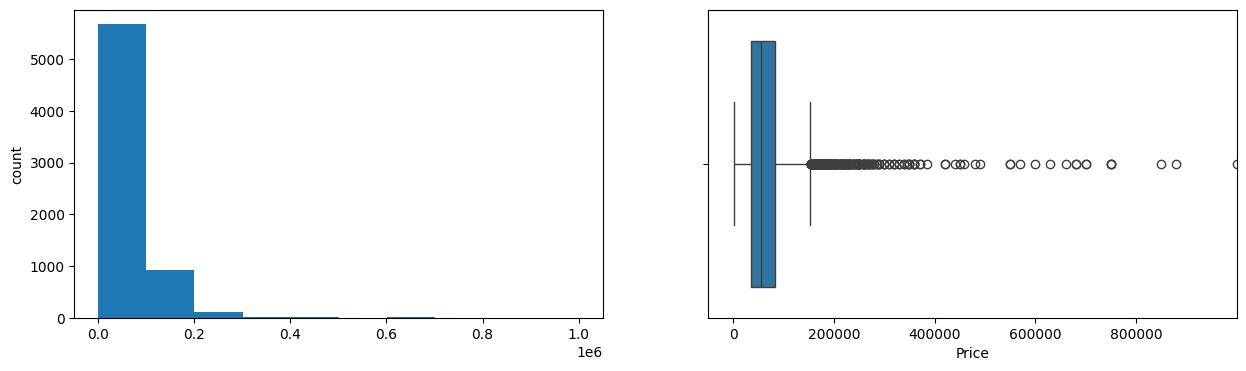

Year
Skew : -1.34


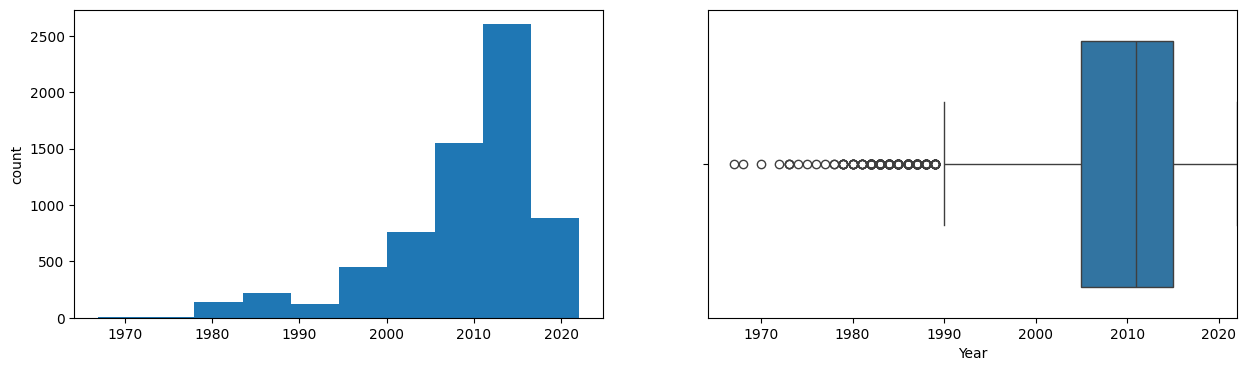

Engine_Capacity
Skew : 2.71


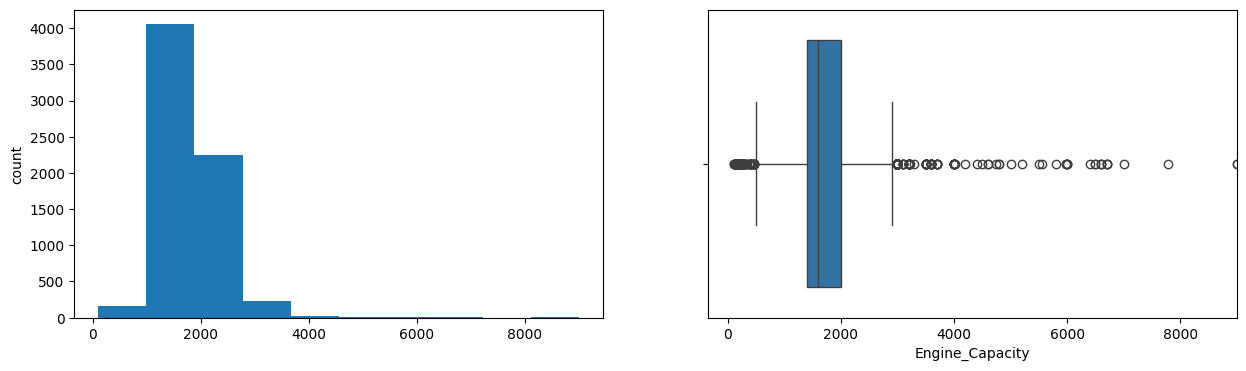

Kilometers_Driven
Skew : 82.07


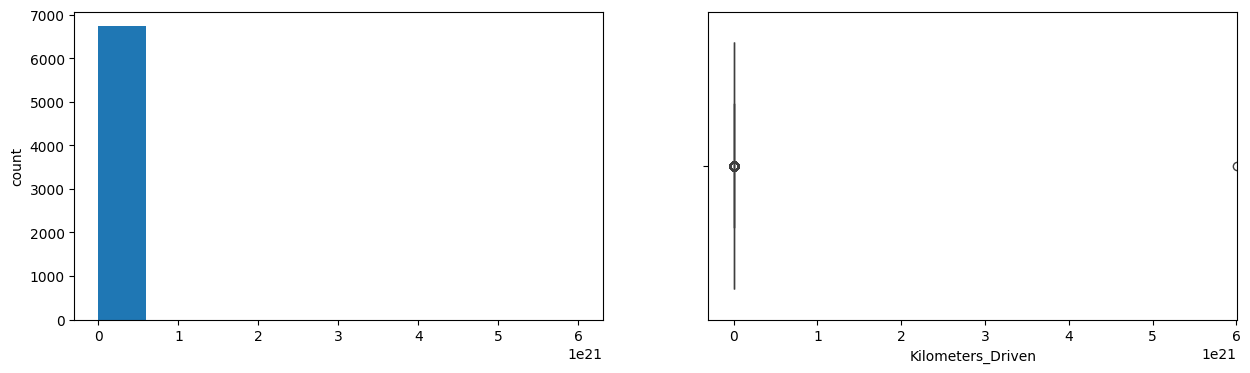

Seats
Skew : 42.01


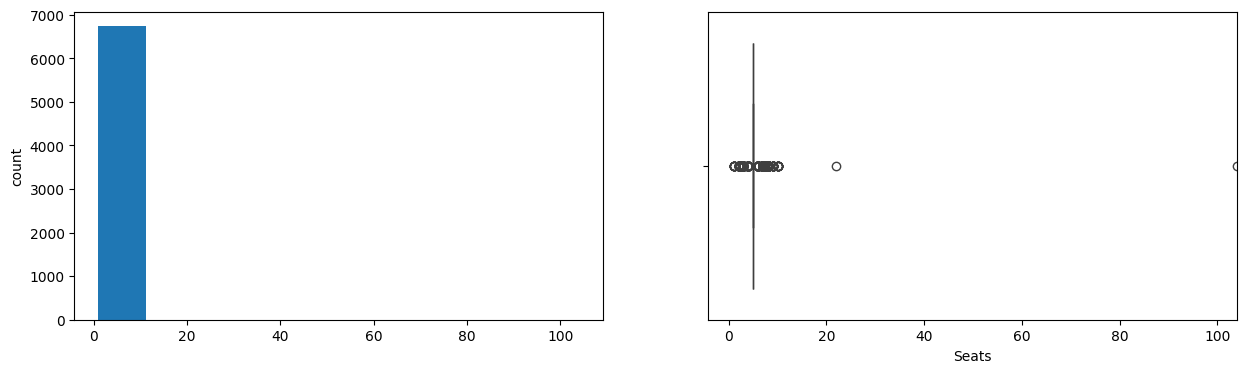

In [30]:
for col in numerical_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.xlim(right=df[col].max())
    plt.show()

##### We can see from the above plots that the "Previous Owners", "Kilometers Driven" and "Seats" are skewed to the right so much we need to take care of the outliers they have

#### Now i wanna see if some features are linked to another or have some kind of relationship between them

##### First i belive that the CD column and Radio column mean the same thing, so i am going to see if thats true in the data, and if so delete the one of them, preferably the CD column

In [31]:
count = (df['CD'] == df['Radio']).sum()
percentage = (count / len(df)) * 100
percentage

99.48040380047506

##### This shows that the CD and Radio columns have the same values thus the same meaning, so i am removing the CD column

In [32]:
df = df.drop(columns=["CD"])
df

,Price,Brand,Model,Year,Color,Fuel_Type,Vehicle_History,Licence,Transmission_Type,Windows_Type,Engine_Capacity,Kilometers_Driven,Seats,Payment_Method,Listed_For,Previous_Owners,Radio,Air_Conditioner,Central_Lock,Airbag,Magnesium_Rims,Alert_System,Leather_Seats,Sunroof
0,100000,كيا,اوبتيما,2014,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,5,نقدا فقط,للبيع فقط,0,1,1,1,1,1,1,1,1
1,60000,كيا,سورينتو,2007,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,8,إمكانية التقسيط,للبيع أو التبديل,2,1,1,1,1,1,1,1,1
2,43500,هونداي,افانتي,2006,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,175154.0,5,نقدا فقط,للبيع فقط,1,1,1,1,1,1,1,1,1
3,5500,فيات,127,1982,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,844862.0,5,إمكانية التقسيط,للبيع فقط,4,1,1,0,0,0,0,1,0
4,54000,بيجو,208,2014,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,5,نقدا فقط,للبيع فقط,0,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,45000,كيا,مورننغ,2015,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000.0,5,إمكانية التقسيط,للبيع فقط,2,0,1,1,1,1,1,0,0
6732,48000,فورد,ترانزيت,2002,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,475435.0,8,نقدا فقط,للبيع فقط,5,1,0,0,0,0,0,0,0
6733,87000,بيجو,بارتنر,2018,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000.0,5,نقدا فقط,للبيع فقط,0,1,1,1,1,0,1,0,0
6734,126000,كيا,سورينتو,2017,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100000.0,7,نقدا فقط,للبيع فقط,0,1,1,1,1,1,1,1,1


##### Now i wanna see the relationship between the "Year" and the "Kilometers_Driven" features, which should be a direct proportion between them, as we know the older the car the more distance it has traveled, but first we wanna remove the outliers in the columns we mentioned above
#### Removing Outliers
starting with "Kilometers_Driven" i am excluding the values above 1M, because i think that these values are unrealistic especially that most of the cars in the data are new releases, seeing above a mean for the "Year" of 2008 is relativly new releases

In [33]:
threshold = 1000000
outliers = df[df["Kilometers_Driven"] > threshold]

df = df.drop(outliers.index).reset_index(drop=True)

Now we want to remove the outliers of the "Previous_Owners", and excelude values over 10 because anywhere above that is kind of unrealistic("From My Experience").

In [34]:
threshold = 10
outliers = df[df["Previous_Owners"] > threshold]

df = df.drop(outliers.index).reset_index(drop=True)

And to finish of with removing the outliers, the "Seats" feature would have at max 60 seats if it was a Large bus, so the threshold here is 60

In [35]:
threshold = 60
outliers = df[df["Seats"] > threshold]

df = df.drop(outliers.index).reset_index(drop=True)

In [36]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,6546.0,NaN,NaN,NaN,67933.758631,57258.532914,1111.0,37000.0,55000.0,85000.0,999999.0
Brand,6546,39,فولكسفاجن,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,6546,390,اوكتافيا,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6546.0,NaN,NaN,NaN,2009.019248,8.345239,1967.0,2006.0,2011.0,2015.0,2022.0
Color,6546,26,أبيض,1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,6546,4,بنزين,3827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_History,6546,6,خصوصي,5609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Licence,6546,2,فلسطينية,6476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission_Type,6546,3,اوتوماتيك,3528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Windows_Type,6546,2,الكتروني,6110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Now the values are quite what we would expect
#### Now let's go back to see the relationship between the "Year" and "Kilometers_Driven"

Text(0.5, 1.0, 'Year Released vs Kilometers Driven')

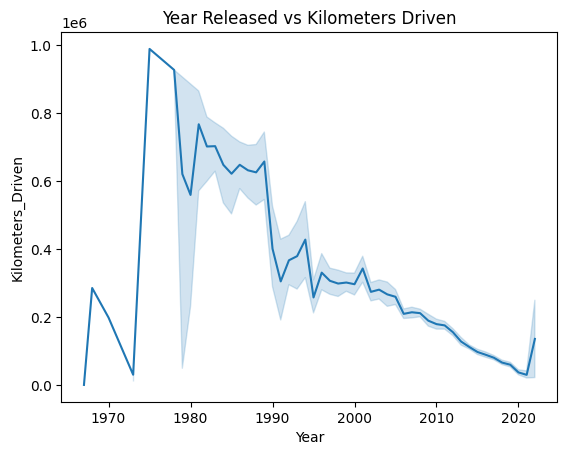

In [37]:
ax = sns.lineplot(x="Year",y="Kilometers_Driven",data=df)
ax.set_title("Year Released vs Kilometers Driven")

##### The above chart is what we would expect for a car Kilometers_Driven to be, as it gets older the Kilometers_Driven increases, so we would expect this to be normal.
#### The other i want to see is the unique values of each feature that has 2 possible values

In [38]:
columns = list(df.columns)
for col in columns:
    unique_list = df[col].unique()
    if len(unique_list) == 2:
        print(f'{col} Values: {unique_list}')

Licence Values: ['فلسطينية ' 'نمرة صفراء ']
Windows_Type Values: ['الكتروني ' 'يدوي ']
Payment_Method Values: ['نقدا فقط ' 'إمكانية التقسيط ']
Radio Values: [1 0]
Air_Conditioner Values: [1 0]
Central_Lock Values: [1 0]
Airbag Values: [1 0]
Magnesium_Rims Values: [1 0]
Alert_System Values: [1 0]
Leather_Seats Values: [1 0]
Sunroof Values: [1 0]


##### From the above breakdown of the features, we can see a few that has two categories which we can replace to zeros and ones (Binary)

The ones we want to binarize are "Licence", "Windows_Type", "Payment_Method"
##### Binarization

##### So lets Binarize the above features, 

for the "Licence" {1 for فلسطينية} {0 for نمرة صفراء}

for the "Windows_Type" {1 for الكتروني}{0 for يدوي}

for the "Payment_Method" {1 for نقدا فقط'}{0 for 'إمكانية التقسيط'}


In [39]:
df["Licence"] = df["Licence"].str.strip()
df["Licence"] = df["Licence"].map({
    "فلسطينية": 1,
    "نمرة صفراء": 0
})

df["Windows_Type"] = df["Windows_Type"].str.strip()
df["Windows_Type"] = df["Windows_Type"].map({
    "الكتروني": 1,
    "يدوي": 0
})

df["Payment_Method"] = df["Payment_Method"].str.strip()
df["Payment_Method"] = df["Payment_Method"].map({
    "نقدا فقط": 0,
    "إمكانية التقسيط": 1
})

In [40]:
df = df.rename(columns={
    "Licence":"Palestinian_Licence",
    "Windows_Type":"Electric_Windows",
    "Payment_Method":"Installment_Payment_Method"
    })
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,6546.0,NaN,NaN,NaN,67933.758631,57258.532914,1111.0,37000.0,55000.0,85000.0,999999.0
Brand,6546,39,فولكسفاجن,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,6546,390,اوكتافيا,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6546.0,NaN,NaN,NaN,2009.019248,8.345239,1967.0,2006.0,2011.0,2015.0,2022.0
Color,6546,26,أبيض,1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,6546,4,بنزين,3827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_History,6546,6,خصوصي,5609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Palestinian_Licence,6546.0,NaN,NaN,NaN,0.989306,0.102863,0.0,1.0,1.0,1.0,1.0
Transmission_Type,6546,3,اوتوماتيك,3528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electric_Windows,6546.0,NaN,NaN,NaN,0.933394,0.249357,0.0,1.0,1.0,1.0,1.0


#### Now if recall the charts at the begining where we showed the skew, we can see the numerical features looking better with less skew, but there is still

##### 

Price


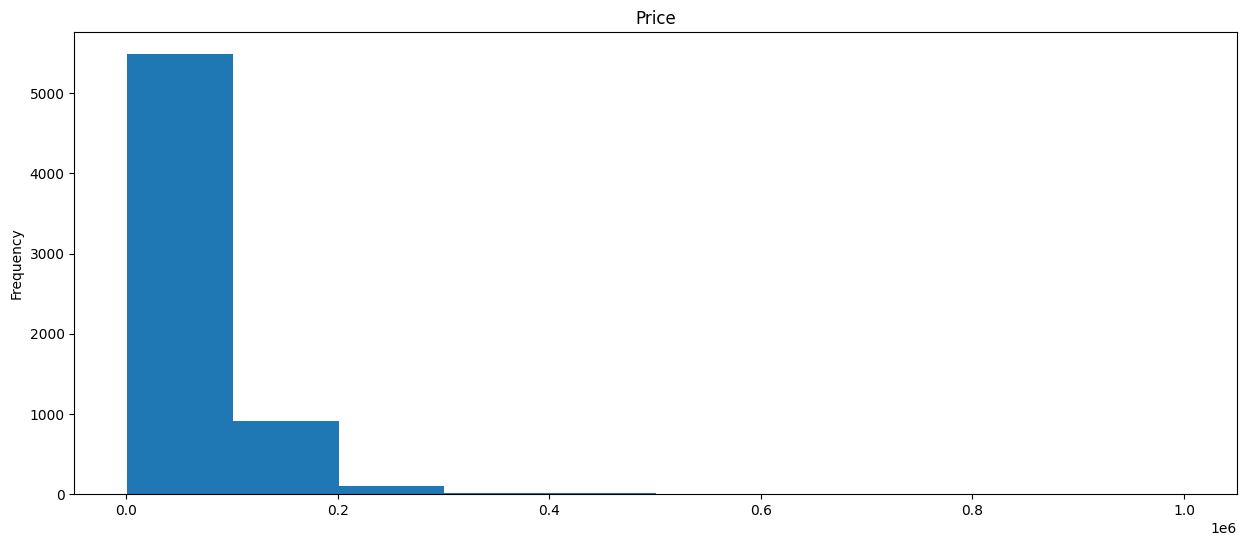

Year


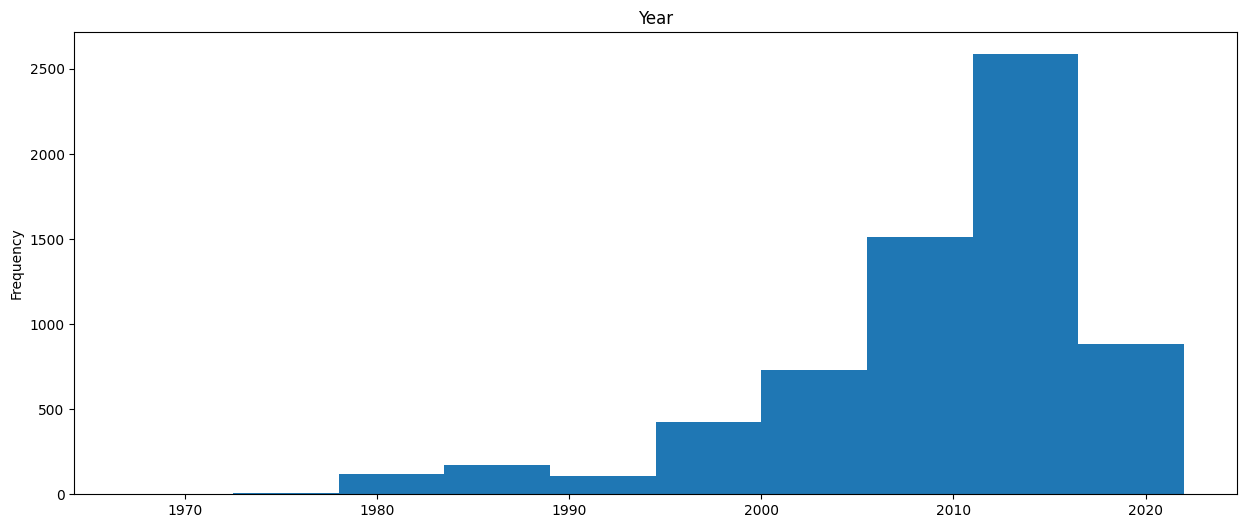

Engine_Capacity


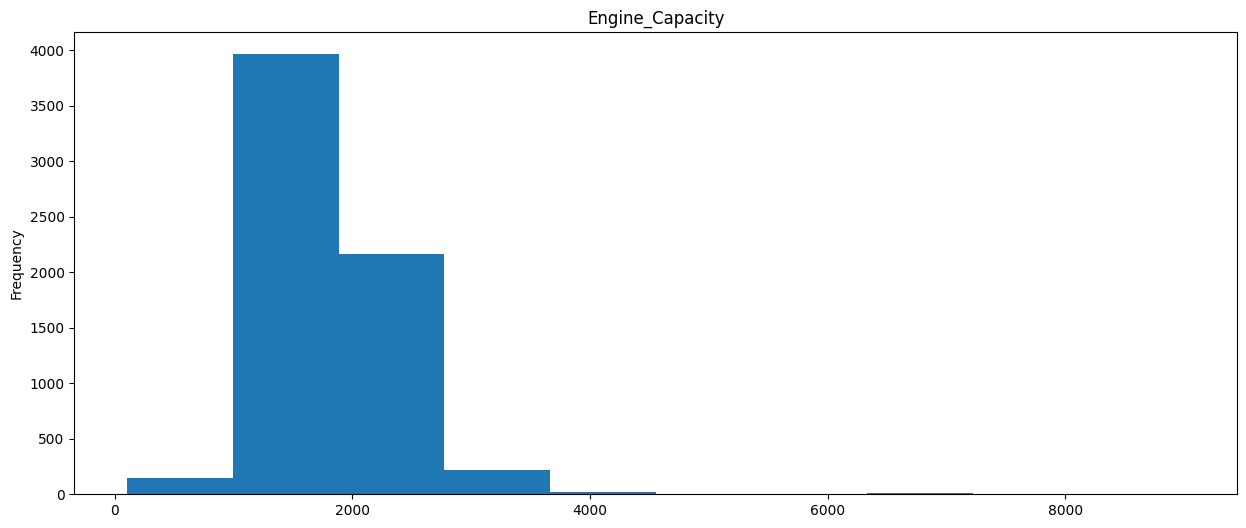

Kilometers_Driven


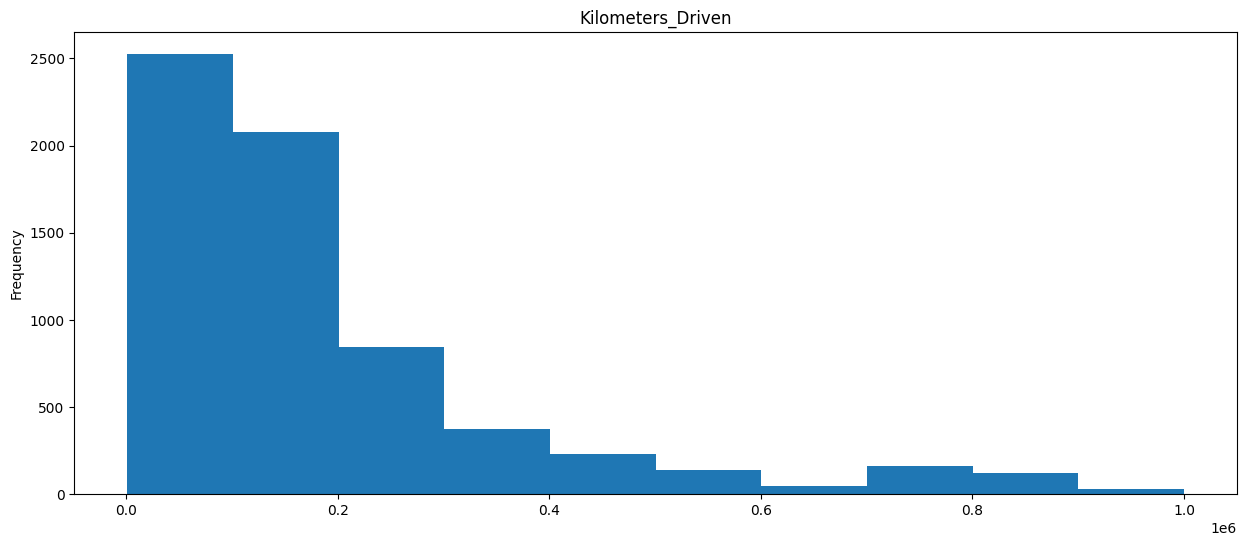

Seats


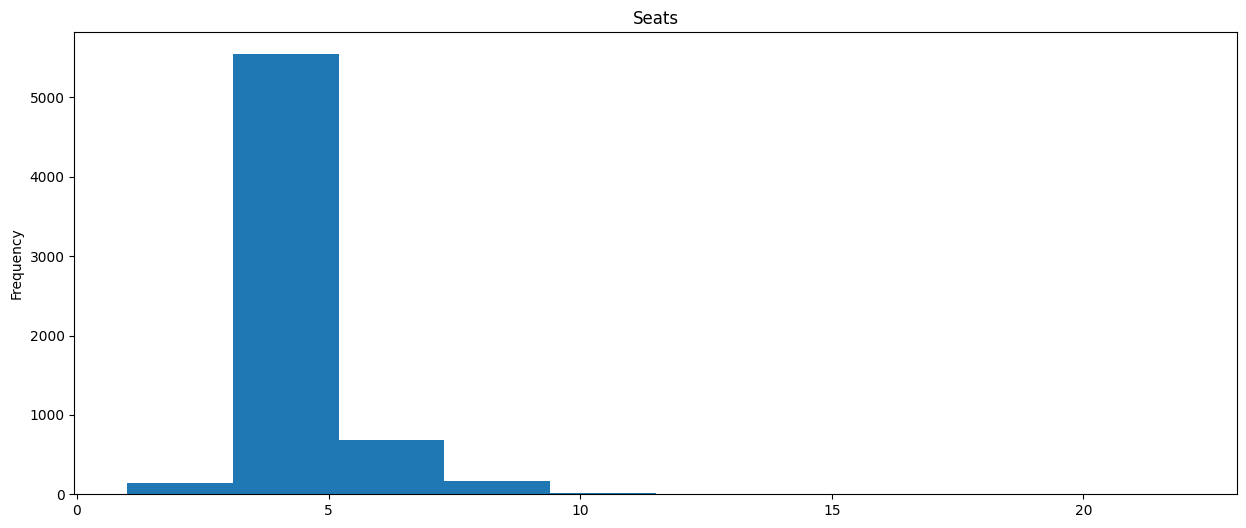

In [41]:
for col in numerical_cols:
    print(col)
    plt.figure(figsize = (15, 6))
    df[col].plot(kind="hist",title=col)
    plt.show()

#### From the charts above, what catches my eyes are the Kilometers_Driven and the Previous_Owners features, and i'll go over them below, the rest are as i would expect them to be

#### Kilometers_Driven
##### I want to damp down the values here and normalize them which would help to reduce the gap between its values and the other features (we'll see how that helps when we reach the "converting ctagories to numeric" step) and would also help with the skew a bit, so what i've chose is the ZScore method, so let's impliment it
##### The mean and the std should be exported to be used in the transformation of future data to predict

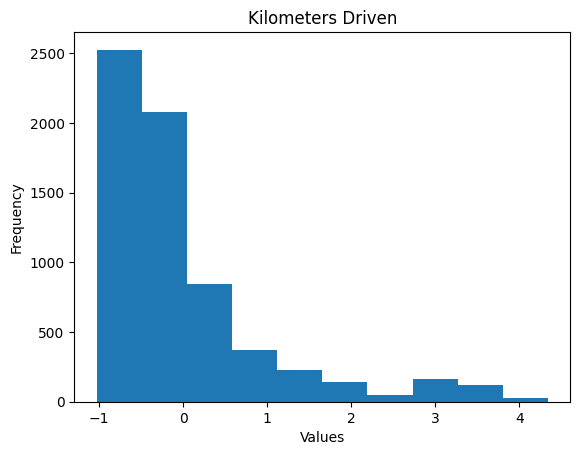

In [42]:
# l, optimal_lambda = stats.boxcox(np.array(df['Kilometers_Driven']))
# df['Kilometers_Driven_Lambda_Optimal'] = stats.boxcox(df['Kilometers_Driven'], lmbda=optimal_lambda)

# threshold = 500000
# outliers = df[df["Kilometers_Driven"] > threshold]

# df = df.drop(outliers.index).reset_index(drop=True)


df['Kilometers_Driven_ZScore'] = stats.zscore(df['Kilometers_Driven'])

mean_kilometers_driven = df['Kilometers_Driven'].mean()
std_kilometers_driven = df['Kilometers_Driven'].std()


df['Kilometers_Driven_ZScore'].plot(kind="hist",title="Kilometers Driven",xlabel="Values")

plt.show()

##### The above graph seems way better now, let's continue

#### Previous_Owners
##### I was thinking of doing some adaptive binning to this feature, but as of my experience in this field i have some ranges that people create in their minds about cars and these ranges are what i belive affect the price not the numerical ranges, so (As of my experience) i would make fixed ranges for the feature as follows (0-2),(3-4)(5 and above), so let's get to it

In [43]:
df['Previous_Owners_Ranges'] = pd.cut(df['Previous_Owners'], bins=[-1, 2, 4, 100], labels=['[0-2]', '[3-4]', '[5+)'])
df['Previous_Owners_Labels'] = pd.cut(df['Previous_Owners'], bins=[-1, 2, 4, 100], labels=[1, 2, 3])

In [44]:
df

,Price,Brand,Model,Year,Color,Fuel_Type,Vehicle_History,Palestinian_Licence,Transmission_Type,Electric_Windows,Engine_Capacity,Kilometers_Driven,Seats,Installment_Payment_Method,Listed_For,Previous_Owners,Radio,Air_Conditioner,Central_Lock,Airbag,Magnesium_Rims,Alert_System,Leather_Seats,Sunroof,Kilometers_Driven_ZScore,Previous_Owners_Ranges,Previous_Owners_Labels
0,100000,كيا,اوبتيما,2014,أبيض عاجي,بنزين,خصوصي,1,اوتوماتيك,1,2000,75000.0,5,0,للبيع فقط,0,1,1,1,1,1,1,1,1,-0.629108,[0-2],1
1,60000,كيا,سورينتو,2007,سكني,ديزل,خصوصي,1,نصف اوتوماتيك,1,2500,130000.0,8,1,للبيع أو التبديل,2,1,1,1,1,1,1,1,1,-0.333756,[0-2],1
2,43500,هونداي,افانتي,2006,سكني,بنزين,خصوصي,1,اوتوماتيك,1,1600,175154.0,5,0,للبيع فقط,1,1,1,1,1,1,1,1,1,-0.091277,[0-2],1
3,5500,فيات,127,1982,بيج,بنزين,خصوصي,1,عادي,0,906,844862.0,5,1,للبيع فقط,4,1,1,0,0,0,0,1,0,3.505080,[3-4],2
4,54000,بيجو,208,2014,فضي,بنزين,خصوصي,1,اوتوماتيك,1,1200,38000.0,5,0,للبيع فقط,0,0,1,1,1,1,1,0,0,-0.827799,[0-2],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6541,50000,كيا,سول,2012,أبيض,ديزل,خصوصي,1,اوتوماتيك,1,1600,249037.0,5,0,للبيع فقط,1,1,1,1,1,0,0,0,0,0.305478,[0-2],1
6542,45000,كيا,مورننغ,2015,فيراني,كهرباء,خصوصي,1,اوتوماتيك,1,1000,130000.0,5,1,للبيع فقط,2,0,1,1,1,1,1,0,0,-0.333756,[0-2],1
6543,48000,فورد,ترانزيت,2002,أبيض,ديزل,عمومي,1,عادي,1,2400,475435.0,8,0,للبيع فقط,5,1,0,0,0,0,0,0,0,1.521243,[5+),3
6544,87000,بيجو,بارتنر,2018,فضي,ديزل,خصوصي,1,عادي,1,1600,50000.0,5,0,للبيع فقط,0,1,1,1,1,0,1,0,0,-0.763359,[0-2],1


## ----------------------

#### Now we have a few catagorical features that need to be transformed to numerical types, one of the ways we can do that is dealing with each unique value as a stand alone feature, the only thing that i am hesitant about is wheather i merge the Brand and the Model features into one or keep them as they are currenlty, we can't judge until we compare the two approaches, so lets start 

###### Brand

In [45]:
brand_le = LabelEncoder()
brand_labels = brand_le.fit_transform(df['Brand'])

brand_onehot = OneHotEncoder()
brand_feature_arr = brand_onehot.fit_transform(
                              df[['Brand']]).toarray()

brand_onehot_feature_labels = list(brand_le.classes_)

brand_onehot_features = pd.DataFrame(brand_feature_arr, 
                            columns=brand_onehot_feature_labels)

df = pd.concat([df[df.columns],brand_onehot_features],axis=1)

###### Model

In [46]:
model_le = LabelEncoder()
model_labels = model_le.fit_transform(df['Model'])

model_onehot = OneHotEncoder()
model_feature_arr = model_onehot.fit_transform(
                              df[['Model']]).toarray()

model_onehot_feature_labels = ['Model_'+str(label)
                           for label in model_le.classes_]

model_onehot_features = pd.DataFrame(model_feature_arr, 
                            columns=model_onehot_feature_labels)
df = pd.concat([df[df.columns],model_onehot_features],axis=1)

In [47]:
# df["Brand_Model"] = df["Brand"] + "_" + df["Model"]

In [48]:
# brand_model_le = LabelEncoder()
# brand_model_labels = brand_model_le.fit_transform(df['Brand_Model'])

# brand_model_onehot = OneHotEncoder()
# brand_model_feature_arr = brand_model_onehot.fit_transform(
#                               df[['Brand_Model']]).toarray()

# brand_model_onehot_feature_labels = list(brand_model_le.classes_)

# brand_model_onehot_features = pd.DataFrame(brand_model_feature_arr, 
#                             columns=brand_model_onehot_feature_labels)

# df = pd.concat([df[df.columns],brand_model_onehot_features],axis=1)

##### Now i want to remove some features that i think are irrelevant to car price. the Color, and Magnesium_Rims, Listed_For, these three don't provide much of a value so i am removing them

In [49]:
df = df.drop(columns=["Color","Magnesium_Rims","Listed_For"]).reset_index(drop=True)

##### Now Let's continue

###### Fuel_Type

In [50]:
fuel_type_le = LabelEncoder()
fuel_type_labels = fuel_type_le.fit_transform(df['Fuel_Type'])

fuel_type_onehot = OneHotEncoder()
fuel_type_feature_arr = fuel_type_onehot.fit_transform(
                              df[['Fuel_Type']]).toarray()

fuel_type_onehot_feature_labels = list(fuel_type_le.classes_)

fuel_type_onehot_features = pd.DataFrame(fuel_type_feature_arr, 
                            columns=fuel_type_onehot_feature_labels)

##### Now regarding the fuel type, its know for the cars that are hyprid or electric to be a bit more pricey than other cars, so to accommodate for this, i would think that after we did the onehotencoding giving a bit more weight to the hyprid and electric variants would make sense, so let's do it

In [51]:
fuel_type_onehot_features["كهرباء "] = fuel_type_onehot_features["كهرباء "]*2.5
fuel_type_onehot_features["هايبرد "] = fuel_type_onehot_features["هايبرد "]*1.5

df = pd.concat([df[df.columns],fuel_type_onehot_features],axis=1)
fuel_type_onehot_features

,بنزين,ديزل,كهرباء,هايبرد
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
6541,0.0,1.0,0.0,0.0
6542,0.0,0.0,2.5,0.0
6543,0.0,1.0,0.0,0.0
6544,0.0,1.0,0.0,0.0


###### Vehicle_History

In [52]:
vehicle_history_le = LabelEncoder()
vehicle_history_labels = vehicle_history_le.fit_transform(df['Vehicle_History'])

vehicle_history_onehot = OneHotEncoder()
vehicle_history_feature_arr = vehicle_history_onehot.fit_transform(
                              df[['Vehicle_History']]).toarray()

vehicle_history_onehot_feature_labels = list(vehicle_history_le.classes_)

vehicle_history_onehot_features = pd.DataFrame(vehicle_history_feature_arr, 
                            columns=vehicle_history_onehot_feature_labels)

df = pd.concat([df[df.columns],vehicle_history_onehot_features],axis=1)

###### Transmission_Type

In [53]:
transmission_type_le = LabelEncoder()
transmission_type_labels = transmission_type_le.fit_transform(df['Transmission_Type'])

transmission_type_onehot = OneHotEncoder()
transmission_type_feature_arr = transmission_type_onehot.fit_transform(
                              df[['Transmission_Type']]).toarray()

transmission_type_onehot_feature_labels = list(transmission_type_le.classes_)

transmission_type_onehot_features = pd.DataFrame(transmission_type_feature_arr, 
                            columns=transmission_type_onehot_feature_labels)

df = pd.concat([df[df.columns],transmission_type_onehot_features],axis=1)

In [54]:
df

,Price,Brand,Model,Year,Fuel_Type,Vehicle_History,Palestinian_Licence,Transmission_Type,Electric_Windows,Engine_Capacity,Kilometers_Driven,Seats,Installment_Payment_Method,Previous_Owners,Radio,Air_Conditioner,Central_Lock,Airbag,Alert_System,Leather_Seats,Sunroof,Kilometers_Driven_ZScore,Previous_Owners_Ranges,Previous_Owners_Labels,Dodge,أفيكو,الفا,اوبل,اودي,ايسوزو,باص,بي,بيجو,تويوتا,جاجوار,جي,جييب,داتشيا,داف,دايو,دراجة,روفر,رينو,سانغ,ستروين,سكودا,سوبارو,سوزوكي,سيت,شاحنة,شفروليه,فورد,فولفو,فولكسفاجن,فيات,كيا,لاندروفر,مازدا,مرسيدس,ميتسوبيشي,نيسان,هوندا,هونداي,Model_107,Model_1117,Model_127,Model_12ستيشن,Model_131,Model_150E25,Model_1524,Model_1624,Model_170,Model_180,Model_190,Model_200,Model_2008,Model_205,Model_206,Model_206+,Model_207,Model_208,Model_212,Model_220,Model_230,Model_240,Model_250,Model_260,Model_280,Model_3,Model_300,Model_3008,Model_301,Model_305,Model_306,Model_307,Model_308,Model_313,Model_323,Model_350,Model_404,Model_405,Model_406,Model_407,Model_410,Model_411,Model_412,Model_413,Model_416,Model_440,Model_45,Model_5,Model_5008,Model_508,Model_50C13,Model_518,Model_519,Model_55,Model_6,Model_607,Model_614,Model_65C18,Model_711,Model_80,Model_814,Model_87,Model_88,Model_914,Model_A3,Model_A4,Model_A6,Model_A8,Model_A80,Model_B2500,Model_B3,Model_B4,Model_BT50,Model_C,Model_C-Elysee,Model_C1,Model_C180,Model_C200,Model_C220,Model_C230,Model_C250,Model_C270,Model_C3,Model_C300,Model_C5,Model_CC,Model_CF85,Model_CLA180,Model_CR-V,Model_Compas,Model_Compass,Model_DS3,Model_Ds5,Model_E200,Model_E220,Model_E230,Model_E250,Model_E270,Model_E280,Model_E300,Model_E320,Model_E350,Model_F,Model_F350,Model_FH,Model_FL,Model_FL6,Model_FM,Model_Fl6,Model_GLA,Model_GLA200,Model_GLC,Model_GLC250,Model_GTI,Model_Golf,Model_H1,Model_H100,Model_I30,Model_I300,Model_IVIECO,Model_K3,Model_K5,Model_Kawasaki,Model_L200,Model_L400,Model_LT,Model_LV200,Model_MPI,Model_Massey,Model_Patriot,Model_Q5,Model_Q7,Model_R5,Model_R9,Model_Renegade,Model_S320,Model_S350,Model_S350Long,Model_S500,Model_SL350,Model_Slin,Model_Spacetourer,Model_TT,Model_Tepee,Model_Tsi,Model_Vandora,Model_Wrangler,Model_XE,Model_c,Model_c15,Model_c3,Model_citigo,Model_cx3,Model_e270,Model_i10,Model_i20,Model_i25,Model_i30,Model_i40,Model_ix35,Model_k3,Model_lf.55.220.,Model_s400,Model_sofa,Model_t-cross,Model_t-roc,Model_tucan,Model_w210,Model_أتيكا,Model_أفيكو,Model_أفيوو,Model_ألتيما,Model_أماروك,Model_أوميغا,Model_إنسيجنيا,Model_ابيزا,Model_اتراج,Model_اتكو,Model_اتكوا,Model_اتوس,Model_اتيكو,Model_ارونا,Model_استر,Model_استرا,Model_اسكانيا,Model_اسكورت,Model_اسكونا,Model_افانتي,Model_افيو,Model_اكس,Model_اكسبرت,Model_اكسبرس,Model_اكسبلورر,Model_اكسنت,Model_اكورد,Model_الانترا,Model_الميرا,Model_ام,Model_امبريزا,Model_اوبترا,Model_اوبتيما,Model_اوت,Model_اوتوبيانكي,Model_اورايون,Model_اوكتافيا,Model_اونو,Model_ايدج,Model_ايونيك,Model_باترول,Model_باتريوت,Model_باجيرو,Model_بارتنر,Model_باسات,Model_باص,Model_باندا,Model_برادو,Model_برايد,Model_برلنجو,Model_بورا,Model_بوكسر,Model_بولو,Model_بونتباك,Model_بونتو,Model_بونتياك,Model_بيرلينجو,Model_بيكاسو,Model_بيكانتو,Model_تراجيت,Model_ترافرس,Model_ترانزيت,Model_ترانسبورتر,Model_تروبر,Model_تعديل,Model_تندر,Model_توران,Model_توسان,Model_توكسون,Model_توليدو,Model_تيبو,Model_تيجوان,Model_تيدا,Model_تيراكان,Model_تيرانو,Model_تيمبرا,Model_تيندرا,Model_جالانت,Model_جامبي,Model_جوالف,Model_جوك,Model_جولف,Model_جيتا,Model_جيتس,Model_داستر,Model_داف,Model_دوبلو,Model_دوكر,Model_ديسكفري,Model_ديفندر,Model_ديلي,Model_ديماكس,Model_رابيد,Model_راف,Model_رام,Model_رانج,Model_رايسر,Model_روبيكون,Model_رومستر,Model_روميو,Model_ريجاتا,Model_رينج,Model_رينو,Model_ريو,Model_زافيرا,Model_سانتافيه,Model_سبارك,Model_سبرنتر,Model_سبورتاج,Model_سبيرو,Model_سبيس,Model_ستونك,Model_ستيب,Model_ستيشن,Model_سكالا,Model_سكانيا,Model_سلندر,Model_سنتافاي,Model_سنتافيه,Model_سنتانا,Model_سوبر,Model_سوبيرب,Model_سوبيربان,Model_سورينتو,Model_سول,Model_سوناتا,Model_سويفت,Model_سيات,Model_سيراتو,Model_سيفيك,Model_سييد,Model_شبح,Model_شحن,Model_شير

#### Now i think we're ready to test the ML Algorithms and see what happens

##### First i wanna create a seperate DataFrame with only the columns that we're going to use

In [55]:
df.columns

Index(['Price', 'Brand', 'Model', 'Year', 'Fuel_Type', 'Vehicle_History',
       'Palestinian_Licence', 'Transmission_Type', 'Electric_Windows',
       'Engine_Capacity',
       ...
       'هايبرد ', 'تأجير ', 'تجاري ', 'تدريب سياقة ', 'حكومي ', 'خصوصي ',
       'عمومي ', 'اوتوماتيك ', 'عادي ', 'نصف اوتوماتيك '],
      dtype='object', length=466)

In [56]:
test_df = df.copy()
test_df = test_df.drop(columns=["Brand","Model","Fuel_Type","Transmission_Type","Vehicle_History","Previous_Owners_Ranges","Previous_Owners","Kilometers_Driven"]).reset_index(drop=True)
test_df

,Price,Year,Palestinian_Licence,Electric_Windows,Engine_Capacity,Seats,Installment_Payment_Method,Radio,Air_Conditioner,Central_Lock,Airbag,Alert_System,Leather_Seats,Sunroof,Kilometers_Driven_ZScore,Previous_Owners_Labels,Dodge,أفيكو,الفا,اوبل,اودي,ايسوزو,باص,بي,بيجو,تويوتا,جاجوار,جي,جييب,داتشيا,داف,دايو,دراجة,روفر,رينو,سانغ,ستروين,سكودا,سوبارو,سوزوكي,سيت,شاحنة,شفروليه,فورد,فولفو,فولكسفاجن,فيات,كيا,لاندروفر,مازدا,مرسيدس,ميتسوبيشي,نيسان,هوندا,هونداي,Model_107,Model_1117,Model_127,Model_12ستيشن,Model_131,Model_150E25,Model_1524,Model_1624,Model_170,Model_180,Model_190,Model_200,Model_2008,Model_205,Model_206,Model_206+,Model_207,Model_208,Model_212,Model_220,Model_230,Model_240,Model_250,Model_260,Model_280,Model_3,Model_300,Model_3008,Model_301,Model_305,Model_306,Model_307,Model_308,Model_313,Model_323,Model_350,Model_404,Model_405,Model_406,Model_407,Model_410,Model_411,Model_412,Model_413,Model_416,Model_440,Model_45,Model_5,Model_5008,Model_508,Model_50C13,Model_518,Model_519,Model_55,Model_6,Model_607,Model_614,Model_65C18,Model_711,Model_80,Model_814,Model_87,Model_88,Model_914,Model_A3,Model_A4,Model_A6,Model_A8,Model_A80,Model_B2500,Model_B3,Model_B4,Model_BT50,Model_C,Model_C-Elysee,Model_C1,Model_C180,Model_C200,Model_C220,Model_C230,Model_C250,Model_C270,Model_C3,Model_C300,Model_C5,Model_CC,Model_CF85,Model_CLA180,Model_CR-V,Model_Compas,Model_Compass,Model_DS3,Model_Ds5,Model_E200,Model_E220,Model_E230,Model_E250,Model_E270,Model_E280,Model_E300,Model_E320,Model_E350,Model_F,Model_F350,Model_FH,Model_FL,Model_FL6,Model_FM,Model_Fl6,Model_GLA,Model_GLA200,Model_GLC,Model_GLC250,Model_GTI,Model_Golf,Model_H1,Model_H100,Model_I30,Model_I300,Model_IVIECO,Model_K3,Model_K5,Model_Kawasaki,Model_L200,Model_L400,Model_LT,Model_LV200,Model_MPI,Model_Massey,Model_Patriot,Model_Q5,Model_Q7,Model_R5,Model_R9,Model_Renegade,Model_S320,Model_S350,Model_S350Long,Model_S500,Model_SL350,Model_Slin,Model_Spacetourer,Model_TT,Model_Tepee,Model_Tsi,Model_Vandora,Model_Wrangler,Model_XE,Model_c,Model_c15,Model_c3,Model_citigo,Model_cx3,Model_e270,Model_i10,Model_i20,Model_i25,Model_i30,Model_i40,Model_ix35,Model_k3,Model_lf.55.220.,Model_s400,Model_sofa,Model_t-cross,Model_t-roc,Model_tucan,Model_w210,Model_أتيكا,Model_أفيكو,Model_أفيوو,Model_ألتيما,Model_أماروك,Model_أوميغا,Model_إنسيجنيا,Model_ابيزا,Model_اتراج,Model_اتكو,Model_اتكوا,Model_اتوس,Model_اتيكو,Model_ارونا,Model_استر,Model_استرا,Model_اسكانيا,Model_اسكورت,Model_اسكونا,Model_افانتي,Model_افيو,Model_اكس,Model_اكسبرت,Model_اكسبرس,Model_اكسبلورر,Model_اكسنت,Model_اكورد,Model_الانترا,Model_الميرا,Model_ام,Model_امبريزا,Model_اوبترا,Model_اوبتيما,Model_اوت,Model_اوتوبيانكي,Model_اورايون,Model_اوكتافيا,Model_اونو,Model_ايدج,Model_ايونيك,Model_باترول,Model_باتريوت,Model_باجيرو,Model_بارتنر,Model_باسات,Model_باص,Model_باندا,Model_برادو,Model_برايد,Model_برلنجو,Model_بورا,Model_بوكسر,Model_بولو,Model_بونتباك,Model_بونتو,Model_بونتياك,Model_بيرلينجو,Model_بيكاسو,Model_بيكانتو,Model_تراجيت,Model_ترافرس,Model_ترانزيت,Model_ترانسبورتر,Model_تروبر,Model_تعديل,Model_تندر,Model_توران,Model_توسان,Model_توكسون,Model_توليدو,Model_تيبو,Model_تيجوان,Model_تيدا,Model_تيراكان,Model_تيرانو,Model_تيمبرا,Model_تيندرا,Model_جالانت,Model_جامبي,Model_جوالف,Model_جوك,Model_جولف,Model_جيتا,Model_جيتس,Model_داستر,Model_داف,Model_دوبلو,Model_دوكر,Model_ديسكفري,Model_ديفندر,Model_ديلي,Model_ديماكس,Model_رابيد,Model_راف,Model_رام,Model_رانج,Model_رايسر,Model_روبيكون,Model_رومستر,Model_روميو,Model_ريجاتا,Model_رينج,Model_رينو,Model_ريو,Model_زافيرا,Model_سانتافيه,Model_سبارك,Model_سبرنتر,Model_سبورتاج,Model_سبيرو,Model_سبيس,Model_ستونك,Model_ستيب,Model_ستيشن,Model_سكالا,Model_سكانيا,Model_سلندر,Model_سنتافاي,Model_سنتافيه,Model_سنتانا,Model_سوبر,Model_سوبيرب,Model_سوبيربان,Model_سورينتو,Model_سول,Model_سوناتا,Model_سويفت,Model_سيات,Model_سيراتو,Model_سيفيك,Model_سييد,Model_شبح,Model_شحن,Model_شيروكو,Model_شيروكي,Model_طوارق,Model_عريض,Model_غواصة,Model_فابيا,Model_فرينو,Model_فلوانس,Model_فورتي,Model_فوكس,M

In [57]:
test_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,6546.0,NaN,NaN,NaN,67933.758631,57258.532914,1111.0,37000.0,55000.0,85000.0,999999.0
Year,6546.0,NaN,NaN,NaN,2009.019248,8.345239,1967.0,2006.0,2011.0,2015.0,2022.0
Palestinian_Licence,6546.0,NaN,NaN,NaN,0.989306,0.102863,0.0,1.0,1.0,1.0,1.0
Electric_Windows,6546.0,NaN,NaN,NaN,0.933394,0.249357,0.0,1.0,1.0,1.0,1.0
Engine_Capacity,6546.0,NaN,NaN,NaN,1730.081577,567.796933,106.0,1400.0,1600.0,2000.0,9000.0
...,...,...,...,...,...,...,...,...,...,...,...
خصوصي,6546.0,NaN,NaN,NaN,0.856859,0.350243,0.0,1.0,1.0,1.0,1.0
عمومي,6546.0,NaN,NaN,NaN,0.082035,0.274439,0.0,0.0,0.0,0.0,1.0
اوتوماتيك,6546.0,NaN,NaN,NaN,0.538955,0.498518,0.0,0.0,1.0,1.0,1.0
عادي,6546.0,NaN,NaN,NaN,0.434158,0.495684,0.0,0.0,0.0,1.0,1.0


##### Now according to the above table, between the 75th percentile and the max there's a massive gap, which would hurt the resulting models, so to just fix this issue i belive that if we remove the rows that have the price higher than a certain threshold would be beneficial for us.
##### I think removing the rows that has the price more than the 98th percentile would be good

In [58]:
outliers = test_df[test_df["Price"] > test_df.Price.quantile(0.98)]
test_df = test_df.drop(outliers.index).reset_index(drop=True)

In [59]:
test_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,6415.0,NaN,NaN,NaN,62609.881216,37582.024107,1111.0,37000.0,55000.0,80000.0,210000.0
Year,6415.0,NaN,NaN,NaN,2008.907716,8.357850,1967.0,2006.0,2011.0,2015.0,2022.0
Palestinian_Licence,6415.0,NaN,NaN,NaN,0.989088,0.103897,0.0,1.0,1.0,1.0,1.0
Electric_Windows,6415.0,NaN,NaN,NaN,0.932190,0.251439,0.0,1.0,1.0,1.0,1.0
Engine_Capacity,6415.0,NaN,NaN,NaN,1719.357132,559.577159,106.0,1400.0,1600.0,2000.0,9000.0
...,...,...,...,...,...,...,...,...,...,...,...
خصوصي,6415.0,NaN,NaN,NaN,0.856118,0.350997,0.0,1.0,1.0,1.0,1.0
عمومي,6415.0,NaN,NaN,NaN,0.082619,0.275327,0.0,0.0,0.0,0.0,1.0
اوتوماتيك,6415.0,NaN,NaN,NaN,0.533593,0.498909,0.0,0.0,1.0,1.0,1.0
عادي,6415.0,NaN,NaN,NaN,0.439751,0.496395,0.0,0.0,0.0,1.0,1.0


#### Now let's test the learning algorithms and see what models we get

In [60]:
Y = test_df["Price"].to_numpy()
columns = test_df.columns.to_list()
columns.remove("Price")
X = test_df[columns].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

#### Decision Tree

In [61]:
decision_tree_regressor = DecisionTreeRegressor(random_state = 0) 
decision_tree_regressor.fit(X_train, Y_train) 

DecisionTreeRegressor(random_state=0)

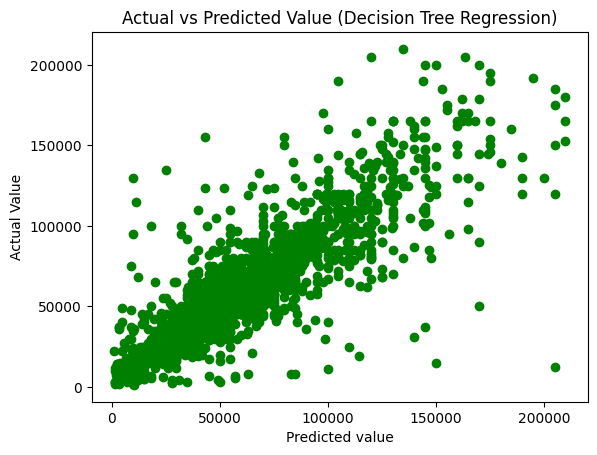

In [62]:
plt.scatter(decision_tree_regressor.predict(X_test),Y_test, color = 'green')  
plt.title('Actual vs Predicted Value (Decision Tree Regression)')  
plt.xlabel('Predicted value') 
plt.ylabel('Actual Value') 
plt.show() 

In [63]:
{"R-Squared 'Higher is better': ":decision_tree_regressor.score(X_test,Y_test),"Mean Squared Error (MSE) 'Lower is better': ":mean_squared_error(Y_test,decision_tree_regressor.predict(X_test))}

{"R-Squared 'Higher is better': ": 0.6951132266881357,
 "Mean Squared Error (MSE) 'Lower is better': ": 406700820.8915729}

##### Now let's see what other algorithms have

#### K-Nearest Neighbors (kNN)

In [64]:
best_score = 0
best_number = 0
for number in range(1,30):
    kNN_regressor = KNeighborsRegressor(n_neighbors=number)
    kNN_regressor.fit(X_train,Y_train)
    score = kNN_regressor.score(X_test,Y_test)
    if score > best_score:
        best_score = score
        best_number = number
"Best n_neighbors: ",best_number," Best R-Squared: ",best_score

('Best n_neighbors: ', 8, ' Best R-Squared: ', 0.7632251339276664)

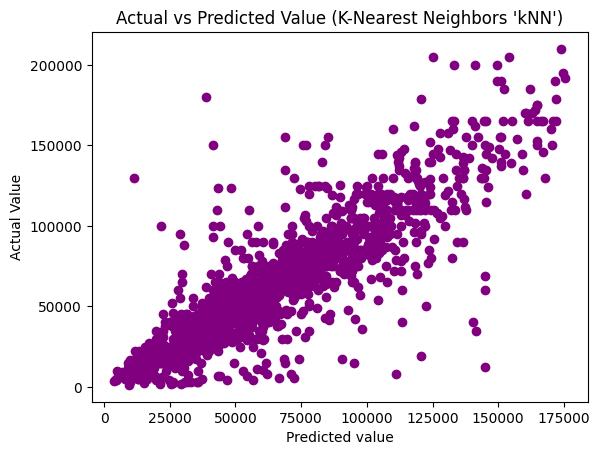

{"R-Squared 'Higher is better': ": 0.760675217612846,
 "Mean Squared Error (MSE) 'Lower is better': ": 319245024.63408434}

In [65]:
kNN_regressor = KNeighborsRegressor(n_neighbors=8)
kNN_regressor.fit(X_train,Y_train)

plt.scatter(kNN_regressor.predict(X_test),Y_test, color = 'purple')  
plt.title("Actual vs Predicted Value (K-Nearest Neighbors 'kNN')")  
plt.xlabel('Predicted value') 
plt.ylabel('Actual Value') 
plt.show() 

{"R-Squared 'Higher is better': ":kNN_regressor.score(X_test,Y_test),"Mean Squared Error (MSE) 'Lower is better': ":mean_squared_error(Y_test,kNN_regressor.predict(X_test))}

In [66]:
mean_squared_error(Y_test,kNN_regressor.predict(X_test))

319245024.63408434

#### I've talked about two approaches at the beginning, the sperate Brand and Model, and the combined Brand and Model, doing the sperate Brand and Model resulted in:

##### Here is the "kNN Model" with
##### R-Squared: 0.7632251339276664, Mean Squared Error (MSE): 315843587.93948054
##### compared to the "Decision Tree" with 
##### R-Squared: 0.6951132266881357, Mean Squared Error (MSE): 406700820.8915729

#### The Combined Brand_Model Approach resulted in:

##### Here is the "kNN Model" with 
##### R-Squared: 0.7468622287992813, Mean Squared Error: 337670730.1129393
##### compared to the "Decision Tree" with 
##### R-Squared: 0.6728073007244987, Mean Squared Error (MSE): 436455599.36757576

### The Winner is the"kNN Model" from the seperate Brand,Model Approach, and that's what we're going to use in the microservice.